# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read file using pandas.

# View sample data

In [7]:
# Your code to read the dataset
df = pd.read_csv("hazelnut.csv")
# Your code to Print sample dataset
df.head()

,sample_id,length,width,thickness,surface_area,mass,compactness,hardness,shell_top_radius,water_content,carbohydrate_content,variety
0,71,11.67,12.8025,8.055075,34.65,1375.50,0.93005,19.145,4.4604,0.048668,0.175,c_avellana
1,72,13.86,13.0995,7.349907,38.10,1439.55,0.93401,8.780,4.7844,0.048826,0.167,c_avellana
2,1,20.53,15.5925,9.565427,49.89,1623.30,0.96217,5.120,5.2893,0.049521,0.174,c_americana
3,73,14.13,12.2220,7.182949,35.43,1412.25,0.90178,13.694,4.8168,0.049595,0.167,c_avellana
4,2,15.85,14.7240,8.622661,43.29,1512.00,0.96261,10.925,4.6296,0.050384,0.173,c_americana


# Print the shape of the pandas dataframe

In [8]:
# Print the shape of the dataframe
print(df.shape)

(201, 12)


# Separate the dataframe into input matrix X and output vector y

In [9]:
X = df.drop('variety',axis=1).values
y = df['variety'].values

# Import the SKlearn methods

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score


# Split the data into train and test sets - X_train, X_test, y_train, y_test.

# Use test size of 40%.

## Hint: Use Sklearn function: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [12]:
# Your code to separate train and test sixe.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
# Your code to Print the shapes of the X_train, X_test, y_train, y_test
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (120, 11)
X_test shape: (81, 11)
y_train shape: (120,)
y_test shape: (81,)


# Scale the dataset between 0-1.

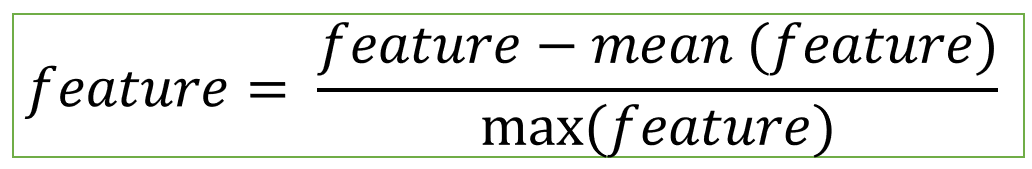

In [13]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Implement Knn classifer using sklearn.

# Use number of neigbours as 3.

In [14]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

# Make predictions on the test sample X_test.

# Print predicted values.

# Print actual test values.

# Are predicted and actual values are equal?

In [15]:
y_pred = knn.predict(X_test)
print (y_pred)
print (y_test)

['c_avellana' 'c_americana' 'c_americana' 'c_avellana' 'c_cornuta'
 'c_avellana' 'c_cornuta' 'c_avellana' 'c_americana' 'c_americana'
 'c_avellana' 'c_cornuta' 'c_cornuta' 'c_avellana' 'c_americana'
 'c_americana' 'c_americana' 'c_avellana' 'c_americana' 'c_cornuta'
 'c_cornuta' 'c_americana' 'c_cornuta' 'c_americana' 'c_cornuta'
 'c_americana' 'c_cornuta' 'c_avellana' 'c_americana' 'c_americana'
 'c_cornuta' 'c_avellana' 'c_americana' 'c_americana' 'c_avellana'
 'c_americana' 'c_avellana' 'c_cornuta' 'c_americana' 'c_cornuta'
 'c_americana' 'c_americana' 'c_avellana' 'c_americana' 'c_cornuta'
 'c_avellana' 'c_avellana' 'c_cornuta' 'c_cornuta' 'c_cornuta'
 'c_americana' 'c_cornuta' 'c_cornuta' 'c_americana' 'c_avellana'
 'c_cornuta' 'c_avellana' 'c_americana' 'c_cornuta' 'c_americana'
 'c_cornuta' 'c_americana' 'c_avellana' 'c_avellana' 'c_americana'
 'c_americana' 'c_cornuta' 'c_americana' 'c_avellana' 'c_avellana'
 'c_avellana' 'c_americana' 'c_avellana' 'c_avellana' 'c_avellana'
 'c

# Print accuracy for training and test set.

In [16]:
print (knn.score(X_train, y_train))
print (knn.score(X_test, y_test))

0.9833333333333333
0.9506172839506173


# Print Classification report - Precision, Recall, and F-score.

In [17]:
print (classification_report(y_test, y_pred))

print (print("Validation Accuracy: ", accuracy_score(y_test, y_pred)))

              precision    recall  f1-score   support

 c_americana       0.90      1.00      0.95        27
  c_avellana       0.96      0.93      0.94        27
   c_cornuta       1.00      0.93      0.96        27

    accuracy                           0.95        81
   macro avg       0.95      0.95      0.95        81
weighted avg       0.95      0.95      0.95        81

Validation Accuracy:  0.9506172839506173
None


# Display Confusion Matrix

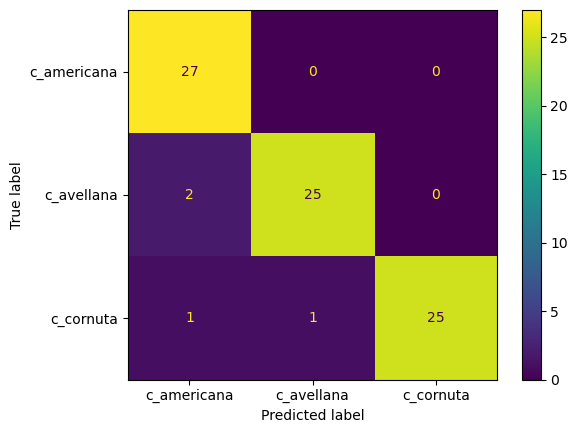

In [18]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = knn.classes_)
disp.plot()
plt.show()

# Till now, we implemented the KNN for number of neigbours 3.
# Now, we will check the accuracy for number of neighbours 1- 10 - all values, and will plot accuracy.

In [22]:
# Your code to create an empty list train_scores
# Your code to create an empty list test_scores
# Your code to create a list neighbours having values [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]. You can create numpy array and use np.arange function.

# for ##...... in #.......: # Your code to fill in the for loop.
  # Create a knn classifier object for particular neigbour value.
  # Fit the classifier on X_train, y_train
  # Make predictions on train data.  Store the values in train_pred variable.
  # Make predictions on test data.  Store the values in test_pred variable.
  # Find accuracy for train data. Hint - use accuracy_score method in sklearn.
  # Find accuracy for test data. Hint - use accuracy_score method in sklearn.
  # Append training accuracy in list train_scores.
  # Append test accuracy in list test-scores.
print("Training set accuracy:", knn.score(X_train, y_train))
print("Test set accuracy:", knn.score(X_test, y_test))

print(classification_report(y_test, y_pred))

print("Validation Accuracy:", accuracy_score(y_test, y_pred))


train_scores = []
test_scores = []
neighbours = np.arange(1, 11)

for n in neighbours:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    train_pred = knn.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_pred)
    test_pred = knn.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_pred)
    train_scores.append(train_accuracy)
    test_scores.append(test_accuracy)



Training set accuracy: 0.975
Test set accuracy: 0.9382716049382716
              precision    recall  f1-score   support

 c_americana       0.90      1.00      0.95        27
  c_avellana       0.96      0.93      0.94        27
   c_cornuta       1.00      0.93      0.96        27

    accuracy                           0.95        81
   macro avg       0.95      0.95      0.95        81
weighted avg       0.95      0.95      0.95        81

Validation Accuracy: 0.9506172839506173


# Plot the accuracy for number of neigbours 1-10.

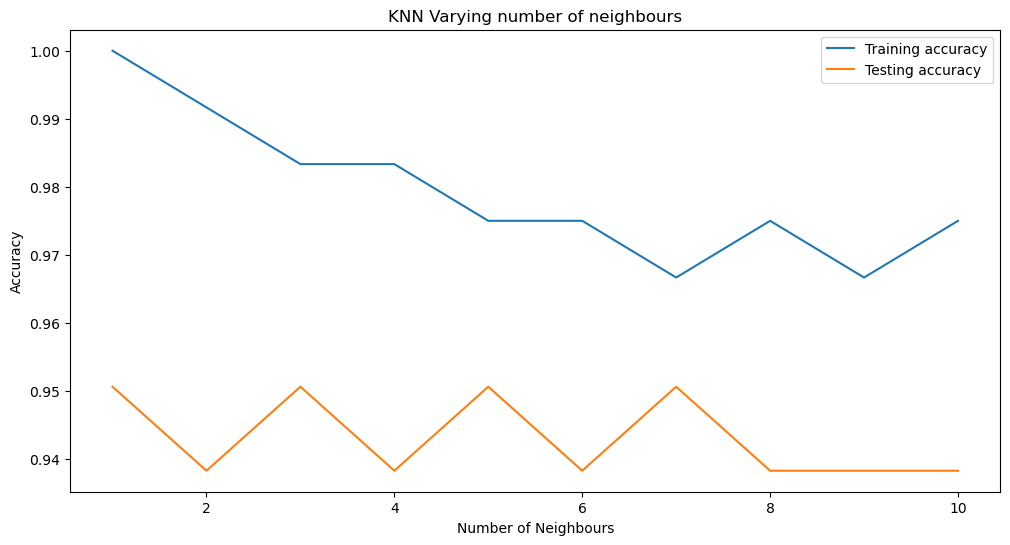

In [23]:
#
# Your code to plot neigbours vs train scores. Proivide label name as the 'train accuracy'
# Your code to plot neigbours vs test scores. Provide label bame as the 'test accuracy'.
#
plt.figure(figsize=(12, 6))
plt.plot(neighbours, train_scores, label='Training accuracy')
plt.plot(neighbours, test_scores, label='Testing accuracy')
plt.xlabel('Number of Neighbours')
plt.ylabel('Accuracy')
plt.title('KNN Varying number of neighbours')
plt.legend()
plt.show()

# Let's implement other ML algorithm that we studied -  Logistic Regression and MLP.

# We will do the same task using Logistic Regression and MLP.

## Implement Logistic Regression and MLP for the same problem and compare accuracy of the three classifiers using Bar plot:


https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html


KNN Training Accuracy: 0.97
KNN Test Accuracy: 0.94

Logistic Regression Training Accuracy: 0.99
Logistic Regression Test Accuracy: 0.96

MLP Training Accuracy: 1.00
MLP Test Accuracy: 0.96



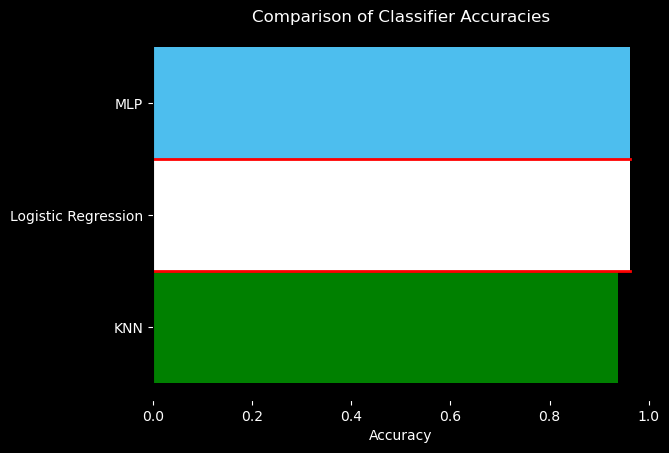

In [59]:
from sklearn.neural_network import MLPClassifier
# Your code to implement Logistic regression and MLP based classifier.
# You could split this code into multiple cells
#
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predicting on the test set
y_pred_log_reg = log_reg.predict(X_test)

# Calculate accuracies
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)

# MLP Classifier
mlp = MLPClassifier(max_iter=1000)
mlp.fit(X_train, y_train)

# Predicting on the test set
y_pred_mlp = mlp.predict(X_test)

# Calculate accuracies
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)

accuracy_knn = knn.score(X_test, y_test) 

print(f"KNN Training Accuracy: {accuracy_knn_train:.2f}")
print(f"KNN Test Accuracy: {accuracy_knn_test:.2f}\n")

print(f"Logistic Regression Training Accuracy: {accuracy_log_reg_train:.2f}")
print(f"Logistic Regression Test Accuracy: {accuracy_log_reg_test:.2f}\n")

print(f"MLP Training Accuracy: {accuracy_mlp_train:.2f}")
print(f"MLP Test Accuracy: {accuracy_mlp_test:.2f}\n")

#plot
labels = ['KNN', 'Logistic Regression', 'MLP']
accuracies = [accuracy_knn_test, accuracy_log_reg_test, accuracy_mlp_test]

fig, ax = plt.subplots()
fig.patch.set_facecolor('black')
ax.set_facecolor('black')

colors = ['green', 'white', '#4DBEEE']


bars = ax.barh(labels, accuracies, color=colors, height=1)

ax.set_xlabel('Accuracy', color='white')
ax.set_title('Comparison of Classifier Accuracies', color='white')

plt.xlim(0, 1) 


ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

mlp_accuracy = accuracies[2]
line_length = mlp_accuracy / ax.get_xlim()[1]

ax.axhline(y=bars[2].get_y(), color='red', linewidth=2, xmin=0, xmax=line_length)
ax.axhline(y=bars[1].get_y(), color='red', linewidth=2, xmin=0, xmax=line_length)

plt.show()


# **Important** -  Lab logbook requirement:
# Put bar plot comparing the accracy of three models in you lablogbook.